Implement a KNN model to classify the animals in to categorie

The k-nearest neighbors algorithm is a non-parametric supervised learning method. It is used for classification and regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Zoo.csv')

In [4]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
data['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

<AxesSubplot:>

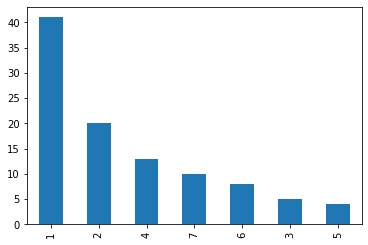

In [7]:
data.type.value_counts().plot(kind='bar')

<AxesSubplot:>

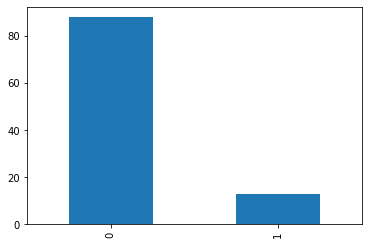

In [8]:
data.domestic.value_counts().plot(kind='bar')

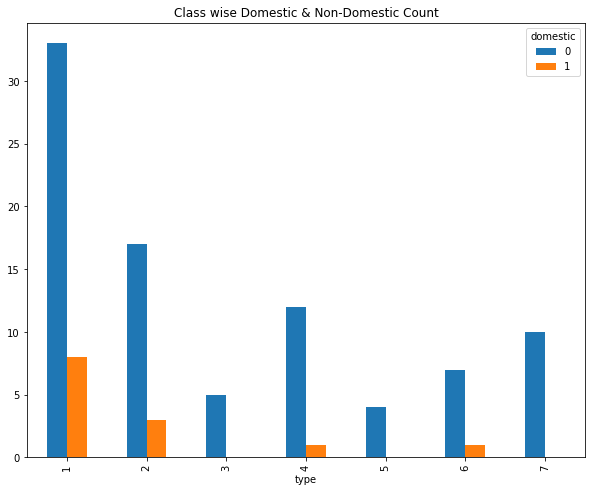

In [9]:
pd.crosstab(data.type, data.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");


In [10]:
data.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

In [11]:
pd.crosstab(data.type,data.milk)


milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


In [12]:
# We can see (type-1)(milk = 1), this shows all the mammals in our list provides milk.
# And no othere class animals gives us milk

In [13]:
#lets check
data[data.type==1].shape[0]

41

In [14]:
#lets find how many aquatic animals
data.aquatic.value_counts()  #36 are aquatic animals

0    65
1    36
Name: aquatic, dtype: int64

In [15]:
#how much counts of aqutaic animals in categories
data[data.aquatic==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

<AxesSubplot:xlabel='type'>

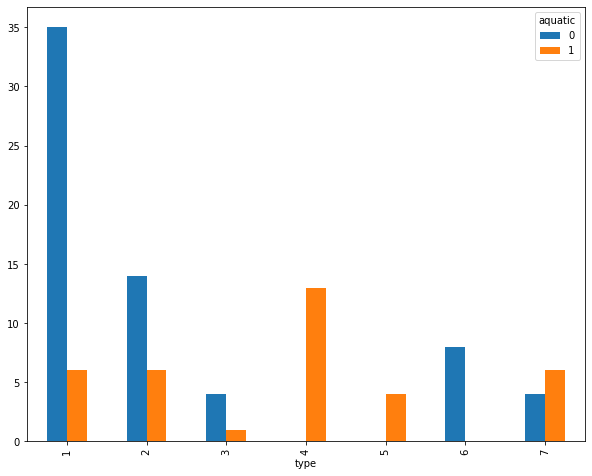

In [16]:
pd.crosstab(data.type,data.aquatic).plot(kind='bar',figsize=(10,8))

In [17]:
#How many are venomous
data.venomous.value_counts()   #8

0    93
1     8
Name: venomous, dtype: int64

In [18]:
pd.crosstab(data.type,data.venomous)

venomous,0,1
type,,
1,41,0
2,20,0
3,3,2
4,12,1
5,3,1
6,6,2
7,8,2


<AxesSubplot:xlabel='type'>

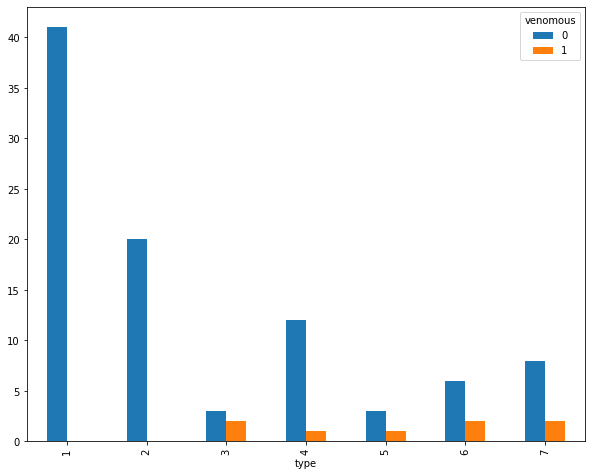

In [19]:
pd.crosstab(data.type,data.venomous).plot(kind='bar',figsize=(10,8))

# Machine Learning Model  (KNN)

In [20]:
#creature features and Targets
data.shape

(101, 18)

In [21]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [22]:
# X = df_animals.iloc[:, 1: 17].values
x=data.loc[:, ["milk", "backbone", "toothed", "venomous", "domestic", "aquatic"]].values
y=data.iloc[:,17].values

In [23]:
x.shape

(101, 6)

In [24]:
y.shape

(101,)

In [25]:
#split train and test data

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [27]:
#create classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5) #default value=5

In [28]:
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [29]:
y_pred = model.predict(xtest)

In [33]:
#Model evaulation -Accuracy
from sklearn.metrics import accuracy_score
results=cross_val_score(model,xtest,ytest,cv=10)

In [45]:
print('cross val score', results.mean())

cross val score 0.8


# Compare with Logistic Regression Classifier¶


In [35]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=0)
clf_log.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [36]:
y_pred_log = clf_log.predict(xtest)

In [37]:
print("Accuracy of Logistic Regression Classifier:",accuracy_score(ytest, y_pred_log))


Accuracy of Logistic Regression Classifier: 0.9230769230769231


# Grid search for Algorithm tuning

In [38]:
n_neighbors=np.array([2*i+1 for i in range(0,10)]) #KNN values should be only Odd.
param_grid=dict(n_neighbors=n_neighbors)

In [39]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [40]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [41]:
print(grid.best_score_)
print(grid.best_params_)

0.8909523809523809
{'n_neighbors': 5}


# Visualizing the CV results

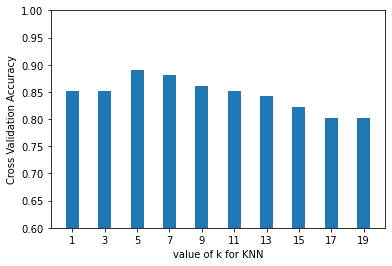

In [42]:
import matplotlib.pyplot as plt
k_range=[2*i+1 for i in range (0,10)]
kscores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5)
    kscores.append(scores.mean())

#plot to see the results
plt.bar(k_range,kscores)
plt.xlabel('value of k for KNN')
plt.ylabel('Cross Validation Accuracy')
plt.ylim(0.6,1)
plt.xticks(k_range)
plt.show()

In [46]:
#The above plot showing  KNN value 5 showing accuracy better than others